# Queimadas no Pantanal: uma análise exploratória dos últimos 10 anos
Este notebook tem como objetivo armazenar e organizar os códigos utilizados para a geração dos relatórios e visualizações utilizados no artigo Queimadas no Pantanal: uma análise exploratória dos últimos 10 anos produzido na disciplina de Fundamentos de Ciência de Dados do PPGI-UFRJ.

## 1. Apresentação do problema

### 1.1 Escolha do dataset
O dataset foi provido pelo LASA, Laboratório de Aplicações de Satélites Ambientais do Departamento de Meteorologia da UFRJ, que tem suas atividades voltadas ao ensino e à pesquisa de técnicas de sensoriamento remoto aplicadas ao monitoramento da atmosfera e superfície terrestre. A iniciativa ALARMES foi desenvolvida para servir como ferramenta de alerta rápido e ágil sobre o avanço da extensão da área afetada pelo fogo de forma a apoiar os órgãos ambientais nas ações de combate ao fogo. O sistema combina imagens de satélites da NASA, focos de calor e inteligência artificial para identificar novas áreas atingidas pelo fogo, monitorando diariamente a localização e extensão das áreas queimadas, permitindo, por exemplo, entender a velocidade de aumento dessas áreas afetadas. Essas informações são enviadas aos órgãos competentes para o planejamento e a realizações de ações efetivas. Neste concexto foi escolhido o bioma Pantanal para objeto de estudo, tendo em vista sua grande importância para o suprimento de água, a estabilização do clima e a conservação do solo no país.




### 1.2 Descrição do dataset

O Dataset utilizado foi disponibilizado em diversos formatos (.shp, .tif, .dbf, .prj, .shx), particulares ao universo de dados geoespaciais, e contém informações sobre as queimadas no bioma Pantanal, sendo elas: geometria(latitude, longitude), confiança, versão, dia juliano, mês e ano da área afetada. O dataset, após concatenações, possui 340.032 mil linhas e 6 colunas.

## 2. Coleta e análise de dados do projeto

### 2.1 Bibliotecas e principais códigos para a organização do ambiente do projeto

In [1]:
# Instalação dos requerimentos para o projeto
#%pip install -r requirements.txt

In [2]:
# Importação das bibliotecas necessárias para o projeto
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as ctx
import warnings
import os
import datetime
#warnings.filterwarnings('ignore')
%matplotlib inline

### 2.2 Carga do dataset
O dataset foi entregue através de um contato dirto com os responsáveis pelo projeto e está dividido em 10 arquivos, sendo eles: 2012.shp, 2013.shp, 2014.shp, 2015.shp, 2016.shp, 2017.shp, 2017.shp, 2018.shp, 2020.shp e 2021.shp. Para a concatenação dos arquivos foi utilizado o comando pd.concat() da biblioteca pandas, que permite a concatenação de DataFrames. O resultado da concatenação foi salvo em um pandas dataframe, que foi utilizado para a análise exploratória dos dados.

In [3]:
# Datasets de entrada do projeto
df2012 = gpd.read_file('Data_Lasa_12_21/alarmes_hist_2012_pantanal.shp')
df2013 = gpd.read_file('Data_Lasa_12_21/alarmes_hist_2013_pantanal.shp')
df2014 = gpd.read_file('Data_Lasa_12_21/alarmes_hist_2014_pantanal.shp')
df2015 = gpd.read_file('Data_Lasa_12_21/alarmes_hist_2015_pantanal.shp')
df2016 = gpd.read_file('Data_Lasa_12_21/alarmes_hist_2016_pantanal.shp')
df2017 = gpd.read_file('Data_Lasa_12_21/alarmes_hist_2017_pantanal.shp')
df2018 = gpd.read_file('Data_Lasa_12_21/alarmes_hist_2018_pantanal.shp')
df2019 = gpd.read_file('Data_Lasa_12_21/alarmes_hist_2019_pantanal.shp')
df2020 = gpd.read_file('Data_Lasa_12_21/alarmes_hist_2020_pantanal.shp')
df2021 = gpd.read_file('Data_Lasa_12_21/alarmes_hist_2021_pantanal.shp')

In [4]:
# Tamanho dos datasets
for i in range(2012,2021):
    print('Tamanho do dataset de {}: {}'.format(i, eval('df{}'.format(i)).shape))

Tamanho do dataset de 2012: (35138, 6)
Tamanho do dataset de 2013: (25297, 6)
Tamanho do dataset de 2014: (13125, 6)
Tamanho do dataset de 2015: (25121, 6)
Tamanho do dataset de 2016: (37822, 6)
Tamanho do dataset de 2017: (35230, 6)
Tamanho do dataset de 2018: (9026, 6)
Tamanho do dataset de 2019: (60313, 6)
Tamanho do dataset de 2020: (98960, 6)


In [5]:
# Concatenação dos datasets
df = pd.concat([df2012, df2013, df2014, df2015, df2016, df2017, df2018, df2019, df2020, df2021], ignore_index=True)
df.head()
print('Tamanho do dataset concatenado: {}'.format(df.shape))

Tamanho do dataset concatenado: (340032, 6)


## 3. Análise Exploratória dos dados

### 3.1 Informações gerais do dataset
Principais informações sobre o dataset, como quantidade de linhas, colunas, tipos de dados, valores nulos, entre outros.

In [6]:
# Estatísticas descritivas completas 
df.describe(include='all').round(2)

,DiaJuliano,Mes,Ano,Versao,NivConf,geometry
count,340032.00,340032,340032.00,340032,340032.00,340032
unique,NaN,12,NaN,1,NaN,317393
top,NaN,09,NaN,Alarmes-Histórico,NaN,POLYGON ((-55.85500000014986 -16.2199999995003...
freq,NaN,126202,NaN,340032,NaN,4
mean,244.63,NaN,2017.07,NaN,0.71,NaN
std,63.49,NaN,2.81,NaN,0.22,NaN
min,1.00,NaN,2012.00,NaN,0.30,NaN
25%,230.00,NaN,2015.00,NaN,0.53,NaN
50%,255.00,NaN,2017.00,NaN,0.75,NaN
75%,277.00,NaN,2020.00,NaN,0.91,NaN


In [7]:
# Primeiras linhas do dataset
df.head()

,DiaJuliano,Mes,Ano,Versao,NivConf,geometry
0,260,09,2012,Alarmes-Histórico,0.3490,"POLYGON ((-57.65500 -15.77500, -57.66000 -15.7..."
1,258,09,2012,Alarmes-Histórico,0.3961,"POLYGON ((-57.65500 -15.78000, -57.66000 -15.7..."
2,298,10,2012,Alarmes-Histórico,0.3176,"POLYGON ((-57.58000 -15.83000, -57.58500 -15.8..."
3,253,09,2012,Alarmes-Histórico,0.3961,"POLYGON ((-57.74000 -15.85000, -57.74500 -15.8..."
4,235,08,2012,Alarmes-Histórico,0.3451,"POLYGON ((-57.85000 -15.86000, -57.85500 -15.8..."


In [8]:
# Quantidade de valores por ano
df['Ano'].value_counts()

2020    98960
2019    60313
2016    37822
2017    35230
2012    35138
2013    25297
2015    25121
2014    13125
2018     9026
Name: Ano, dtype: int64

In [9]:
# Tabela com a quantidade de valores por mês e ano
df.groupby(['Ano', 'Mes']).size().unstack()

Mes,01,02,03,04,05,06,07,08,09,10,11,12
Ano,,,,,,,,,,,,
2012,NaN,NaN,403.0,292.0,317.0,203.0,1491.0,10477.0,13467.0,6288.0,1572.0,628.0
2013,707.0,655.0,844.0,856.0,808.0,30.0,465.0,1641.0,9342.0,4615.0,3670.0,1664.0
2014,480.0,871.0,1286.0,489.0,3105.0,606.0,353.0,516.0,1378.0,3070.0,819.0,152.0
2015,519.0,349.0,240.0,172.0,151.0,580.0,703.0,5592.0,7195.0,4608.0,1524.0,3488.0
2016,878.0,1515.0,216.0,60.0,110.0,216.0,2265.0,5915.0,15605.0,9439.0,996.0,607.0
2017,1885.0,643.0,894.0,246.0,398.0,193.0,2216.0,5557.0,18161.0,3486.0,767.0,784.0
2018,380.0,100.0,54.0,106.0,107.0,58.0,443.0,1541.0,4618.0,530.0,40.0,1049.0
2019,1201.0,1284.0,273.0,271.0,114.0,487.0,1727.0,13854.0,19120.0,14812.0,6122.0,1048.0
2020,808.0,422.0,1685.0,1957.0,858.0,783.0,7189.0,26772.0,37316.0,16367.0,3802.0,1001.0


In [10]:
# Quantidade de valores ausentes por coluna
df.isnull().sum()

DiaJuliano    0
Mes           0
Ano           0
Versao        0
NivConf       0
geometry      0
dtype: int64

In [11]:
# Quantidade de valores NaN por coluna
df.isna().sum()

DiaJuliano    0
Mes           0
Ano           0
Versao        0
NivConf       0
geometry      0
dtype: int64

### 3.2 Análises gráficas e inferências
Análises gráficas e inferências sobre o dataset, como quantidade de focos de calor por ano, mês e dia juliano, entre outros, e o que essas informações podem nos dizer sobre o problema.

In [22]:
df[df['Ano'] == 2012]

,DiaJuliano,Mes,Ano,Versao,NivConf,geometry
0,260,09,2012,Alarmes-Histórico,0.3490,"POLYGON ((-57.65500 -15.77500, -57.66000 -15.7..."
1,258,09,2012,Alarmes-Histórico,0.3961,"POLYGON ((-57.65500 -15.78000, -57.66000 -15.7..."
2,298,10,2012,Alarmes-Histórico,0.3176,"POLYGON ((-57.58000 -15.83000, -57.58500 -15.8..."
3,253,09,2012,Alarmes-Histórico,0.3961,"POLYGON ((-57.74000 -15.85000, -57.74500 -15.8..."
4,235,08,2012,Alarmes-Histórico,0.3451,"POLYGON ((-57.85000 -15.86000, -57.85500 -15.8..."
...,...,...,...,...,...,...
35133,236,08,2012,Alarmes-Histórico,0.3490,"POLYGON ((-57.85500 -22.12000, -57.86000 -22.1..."
35134,236,08,2012,Alarmes-Histórico,0.5490,"POLYGON ((-57.86500 -22.12500, -57.87000 -22.1..."
35135,236,08,2012,Alarmes-Histórico,0.3686,"POLYGON ((-57.86000 -22.12500, -57.86500 -22.1..."
35136,236,08,2012,Alarmes-Histórico,0.4706,"POLYGON ((-57.86500 -22.13000, -57.87000 -22.1..."


In [23]:
# Digite o ano desejado
input_year = int(input('Digite o ano desejado: '))

# Mapa de áreas queimadas em 2020
fig, ax = plt.subplots(figsize=(10,10))
df[df['Ano'] == input_year].plot(ax=ax, color='red', alpha=0.5)
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
ax.set_axis_off()
plt.show()

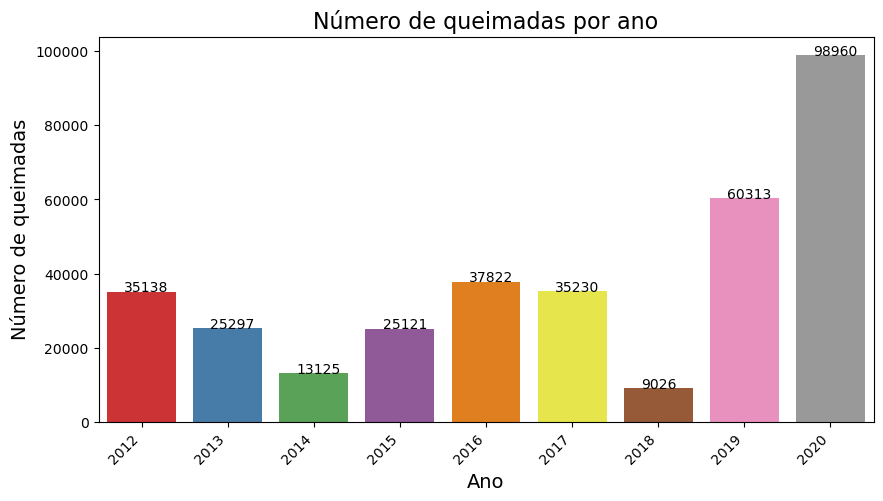

In [13]:
# Gráfico de número de queimadas por ano com tabela de valores
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='Ano', data=df, palette='Set1')
ax.set_title('Número de queimadas por ano', fontsize=16)
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel('Número de queimadas', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+0.5))
plt.show()

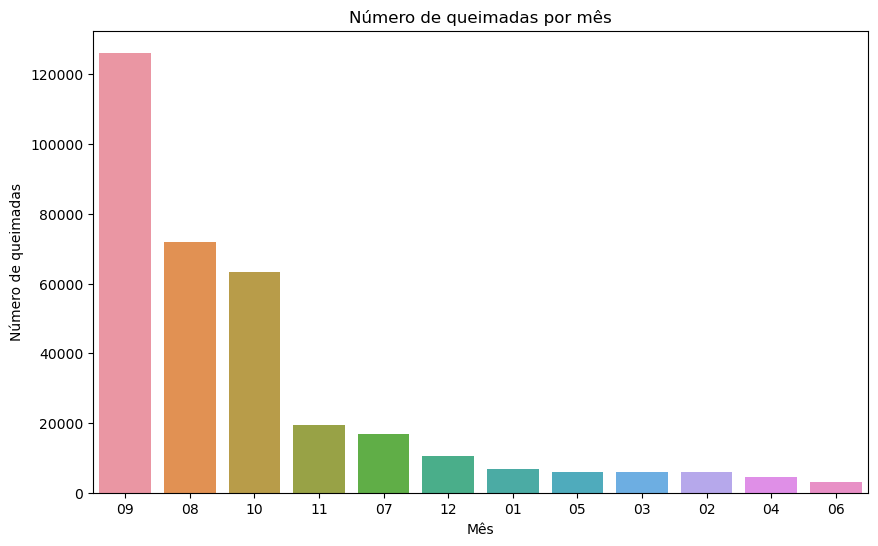

In [14]:
# Gráfico de número de queimadas por mês ordenado
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='Mes', data=df, ax=ax, order=df['Mes'].value_counts().index)
ax.set_title('Número de queimadas por mês')
ax.set_xlabel('Mês')
ax.set_ylabel('Número de queimadas')
plt.show()